In [1]:
# Add all your imports here

import os
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
project_path = os.getcwd() + '/'

DATA_PATH = 'data/'
browser_data_path = DATA_PATH
pycharm_data_path = project_path + DATA_PATH

selected_data_path = browser_data_path
# selected_data_path = pycharm_data_path

kaggle_data_path = selected_data_path + 'kaggle_spam.csv'
dit_data_path = selected_data_path + 'dit_spam.xml'


In [3]:
kaggle_data = pd.read_csv(kaggle_data_path, encoding='latin-1')

kaggle_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Converts XML to DF

def xml2df(xml_data):
    root = ET.XML(xml_data) # element tree
    all_records = []
    for i, child in enumerate(root):
        record = {}
        for subchild in child:
            record[subchild.tag] = subchild.text
            all_records.append(record)
    return pd.DataFrame(all_records)

In [5]:
dit_data_xml = open(dit_data_path).read()

dit_data = xml2df(dit_data_xml)

dit_data.head()

,class,date,number,source,text
0,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
2,spam,NaN,NaN,almeida,Free entry in 2 a wkly comp to win FA Cup fina...
3,spam,NaN,NaN,almeida,FreeMsg Hey there darling it's been 3 week's n...
4,spam,NaN,NaN,almeida,FreeMsg Hey there darling it's been 3 week's n...


In [6]:
kaggle_cleansed_data = kaggle_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
kaggle_cleansed_data = kaggle_cleansed_data.rename(columns={'v1': 'class', 'v2': 'message'})


dit_cleansed_data = dit_data.drop(['date', 'number', 'source'], axis=1)
dit_cleansed_data = dit_cleansed_data.rename(columns={'text': 'message'})

In [7]:
kaggle_cleansed_data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
dit_cleansed_data.head()

,class,message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,spam,FreeMsg Hey there darling it's been 3 week's n...
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [9]:
combined_norm_data = pd.concat([kaggle_cleansed_data, dit_cleansed_data], ignore_index=True)

combined_norm_data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
combined_norm_data.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam     5954   1590  Camera - You are awarded a SiPix Digital Camer...    6

In [11]:
combined_norm_data_unique = combined_norm_data.copy().drop_duplicates()
combined_norm_data_unique.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4516   4516  Eh sorry leh... I din c ur msg. Not sad alread...    1
spam     1590   1590  Our records indicate you may be entitled to 37...    1

In [12]:
combined_norm_data['length'] = combined_norm_data['message'].apply(len)
combined_norm_data.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
combined_norm_data_unique['length'] = combined_norm_data_unique['message'].apply(len)
combined_norm_data_unique.head()

,class,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f16fe69df50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f16fe6e17d0>], dtype=object)

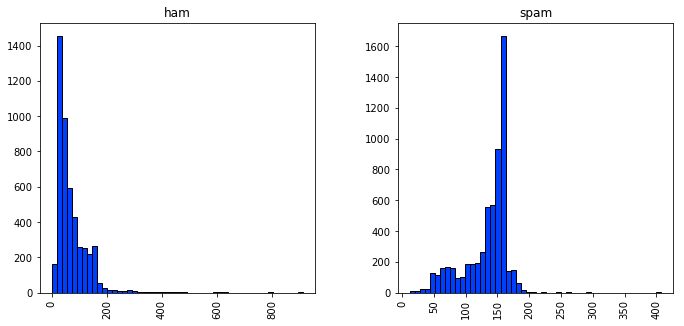

In [14]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
combined_norm_data.hist(column='length', by='class', bins=50,figsize=(11,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f16fe69d710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f16fe8de7d0>], dtype=object)

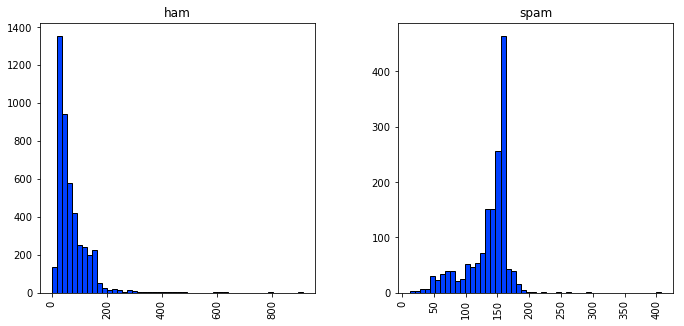

In [15]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
combined_norm_data_unique.hist(column='length', by='class', bins=50,figsize=(11,5))